  Исходное уравнение:
dT/dt  =  (  As*J0*(1+R*np.sin(w*t)) + q - 2*eps*sigm*y*y*y*y  )  /  (  p*Cp*delta  )
T(t0) = T0 =  216.6864420114564 

 Параметры уравнения:
As=0.2
J0=1000
R=0.05
w=5.82/10000
q=0
eps=0.8
sigm=5.67/100000000
p=2700
Cp=920
delta=0.5/1000 
 
 Для промежутка времени 0<=t<=3000 и шага h=120 найдем :

t:           T(t):            T(t)-T(0):     J(t)-J(0):
   0.0       216.68644       -0.00000        0.00000 
 120.0       216.71651        0.03007        3.48916 
 240.0       216.79413        0.10769        6.96131 
 360.0       216.90457        0.21813       10.39952 
 480.0       217.03722        0.35078       13.78703 
 600.0       217.18436        0.49792       17.10731 
 720.0       217.34030        0.65386       20.34418 
 840.0       217.50079        0.81435       23.48187 
 960.0       217.66261        0.97617       26.50506 
1080.0       217.82326        1.13682       29.39903 
1200.0       217.98077        1.29433       32.14966 
1320.0       218.13356       

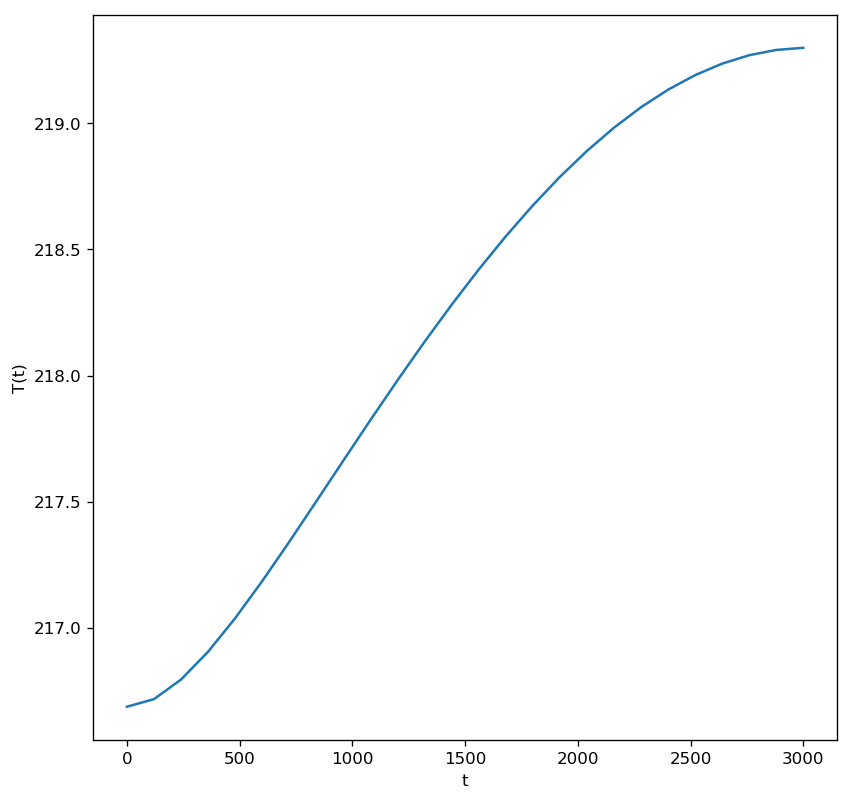

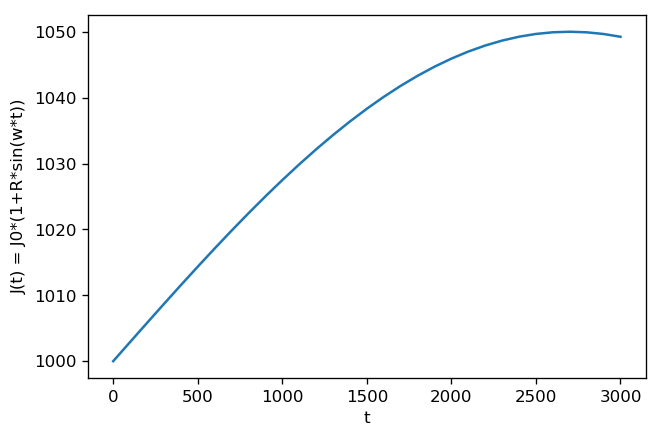


Составим систему (17) и решим ее :
 (B,D,G)  *

 [[35529.05008486 34248.34284063  1588.01116565]
 [34248.34284063 33105.00917116  1543.44116499]
 [ 1588.01116565  1543.44116499    72.93958736]] 

 =  [1672.11073796 1621.29124212   76.18830097]


  B:            D:            G:
[0.00834356 0.00836606 0.6858567 ]


Найдем значения (18),(19):
eps =  0.8456938008067028
As =  0.19508536464928922
